# Result comparison
This notebook contains the hypothesis test for result comparison.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import scikit_posthocs as sp
import scipy.stats as ss

In [3]:
dict_data = {
    'Naive': [0.69, 0.97, 1.03, 0.78, 0.39, 0.46, 0.53, 0.54, 1.13, 1.36, 1.52, 1.57, 1.05, 1.21, 1.31, 1.30, 0.80, 1.00, 1.10, 1.06, 1.19, 1.37, 1.48, 1.47],
    'ARIMA/VAR': [0.90, 0.96, 0.97, 0.98, 0.79, 0.89, 0.98, 1.04, 0.80, 0.97, 1.22, 1.34, 0.80, 0.82, 0.84, 0.86, 0.74, 0.76, 0.77, 0.77, 0.93, 0.95, 0.97, 0.99],
    'DLinear': [0.49, 0.59, 0.55, 0.51, 0.35, 0.39, 0.42, 0.45, 0.79, 0.96, 1.08, 1.17, 0.82, 0.95, 1.04, 1.12, 0.60, 0.71, 0.78, 0.81, 0.89, 1.01, 1.09, 1.14],
    'Informer': [0.21, 0.25, 0.27, 0.28, 0.31, 0.36, 0.41, 0.40, 0.80, 1.00, 1.13, 1.19, 0.98, 1.10, 1.29, 1.26, 0.55, 0.64, 0.74, 0.77, 0.90, 1.08, 1.12, 1.16],
    'Autoformer': [0.27, 0.33, 0.36, 0.39, 0.34, 0.38, 0.40, 0.45, 1.04, 1.18, 1.31, 1.36, 0.93, 1.01, 1.08, 1.12, 0.64, 0.73, 0.83, 0.85, 1.02, 1.14, 1.20, 1.24],
    'TFT': [0.23, 0.29, 0.30, 0.31, 0.35, 0.43, 0.51, 0.50, 0.82, 1.28, 1.34, 1.48, 1.36, 1.45, 1.55, 1.46, 0.71, 0.83, 0.87, 0.95, 1.09, 1.25, 1.29, 1.25],
}

In [4]:
data = (
  pd.DataFrame(dict_data)
  .rename_axis('6 datasets with 4 prediction lengths each')
  .melt(
      var_name='model',
      value_name='RMSE',
      ignore_index=False,
  )
  .reset_index()
)

In [5]:
avg_rank = data.groupby('6 datasets with 4 prediction lengths each').RMSE.rank(pct=False).groupby(data.model).mean()
print(avg_rank)

model
ARIMA/VAR     3.291667
Autoformer    3.250000
DLinear       2.395833
Informer      2.083333
Naive         5.583333
TFT           4.395833
Name: RMSE, dtype: float64


In [6]:
ss.friedmanchisquare(*dict_data.values())

FriedmanchisquareResult(statistic=58.46107784431132, pvalue=2.5266622109410597e-11)

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x7fe17bf44a00>)

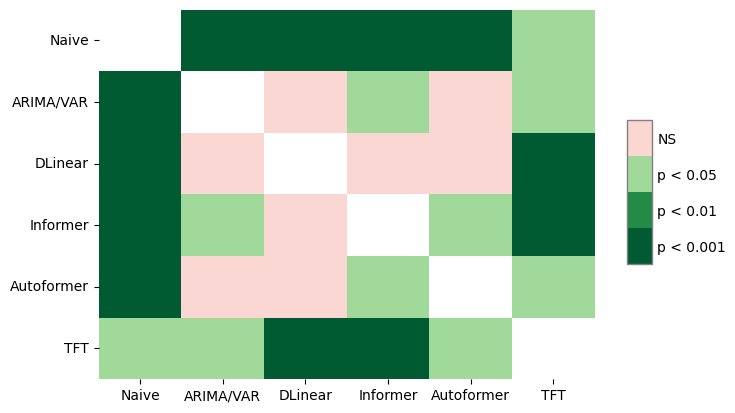

In [7]:
test_results = sp.posthoc_conover_friedman(
    data,
    melted=True,
    block_col='6 datasets with 4 prediction lengths each',
    group_col='model',
    y_col='RMSE',
)
sp.sign_plot(test_results)


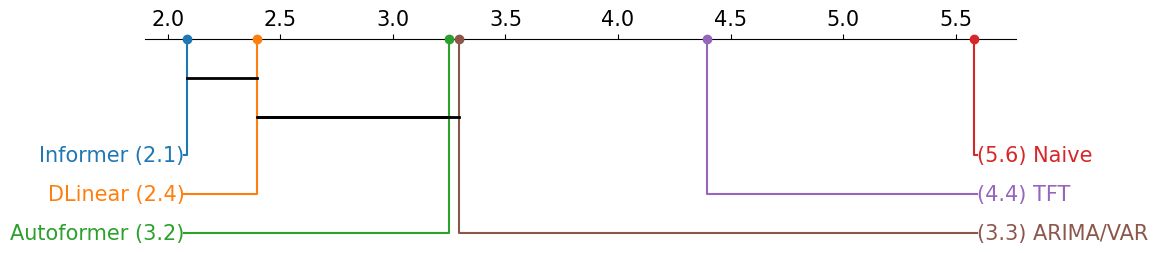

In [9]:
plt.figure(figsize=(12, 3), dpi=100)
#plt.title('Critical difference diagram of models')
sp.critical_difference_diagram(avg_rank, test_results)
plt.rcParams.update({'font.size': plt.rcParams['font.size'] * 1.5})
plt.tight_layout()
plt.savefig('critical_difference_diagram.png')